# Hi!

I'm **Rizky Anshari**,
This notebook is my form of evaluation.

Please take a look and learn.

# Background
A credit card default occurs when you are actually in arrears with your credit card payments and will affect your credit status in general and your ability to get approved for credit cards, loans, and other credit-based services.

What is the process of credit card defaull? For example, you agree to make your minimum payment by the due date listed in your account. credit card statement. If you miss a credit card payment for at least six consecutive months, your credit card will be defaulted. Your credit card issuer will likely close your account and report the default to the credit bureau.

# The Objective
In this observation, a classification model will be made to be able to determine the default payment on the next mount.

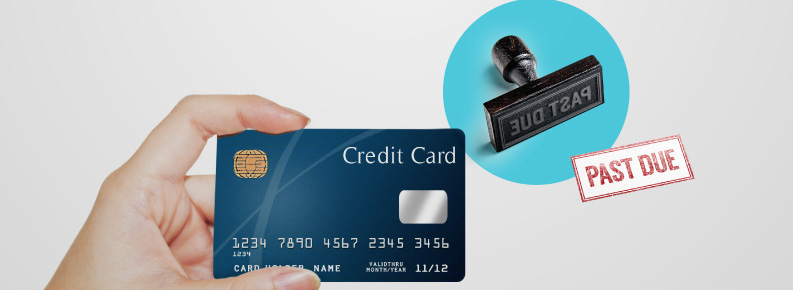

In [53]:
Image(filename='default credit card.png') 

# A. Library

In [2]:
# Data Exploring
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# Data Processing
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

# Data Modelling
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from xgboost import XGBClassifier # Extreme Gradient Boosting

# Data Evaluation
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# B. Data Loading

In [3]:
# load dataset
data = pd.read_csv('Credit_card_default_prediction.csv')

# Change options so that the entire column can be displayed.
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,0,47174.0,47974.0,48630.0,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,0,48088.0,45980.0,44231.0,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,0,78630.0,68921.0,46512.0,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,0,42058.0,35340.0,22110.0,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [5]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,-1,44100.0,0.0,28428.0,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,-1,280.0,6852.0,486.0,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,-2,0.0,47.0,207.0,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,-1,0.0,2920.0,0.0,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,-2,379.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### B1. Data information

In [6]:
# Display information data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

From this basic information, it can be known that datafrane is formed from:
- Number of rows of data: 2965
- Number of columns: 24
- 18 columns of type "float"
- 6 columns of type "integer"

Based on this basic information, it appears that there is no missing value in the dataframe, but the data type must be corrected. 

In [7]:
# describe data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


- No anomalies were found in the data.

In [8]:
# Defining the value of each column
print("All columns Unique values count")
for col in data:
    print(col, len(data[col].unique()), sep=': ')

All columns Unique values count
limit_balance: 59
sex: 2
education_level: 7
marital_status: 4
age: 49
pay_0: 11
pay_2: 10
pay_3: 9
pay_4: 10
pay_5: 9
pay_6: 8
bill_amt_1: 2643
bill_amt_2: 2592
bill_amt_3: 2549
bill_amt_4: 2504
bill_amt_5: 2482
bill_amt_6: 2461
pay_amt_1: 1415
pay_amt_2: 1372
pay_amt_3: 1302
pay_amt_4: 1214
pay_amt_5: 1194
pay_amt_6: 1189
default_payment_next_month: 2


- It was found that some of the data has been encoded, such as the sex, education, and marital status columns, and some of the data has been categorized, as in the pay columns.

# C. Data Cleaning

### C1. Missing Value
*will be checked for missing values.*

In [9]:
# Sum the missing values of each column.
data.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

- There is no missing value in the data.

### C.2 Data duplicated
*In this section, you will check for duplicate data.*

In [10]:
# checking duplicated data
data.duplicated().sum()

1

- There is one duplicated record discovered. 

In [11]:
# drop duplicated
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [12]:
# shape dataset
data.shape

(2964, 24)

# D.Exploratory Data Analysis
*exploring data*

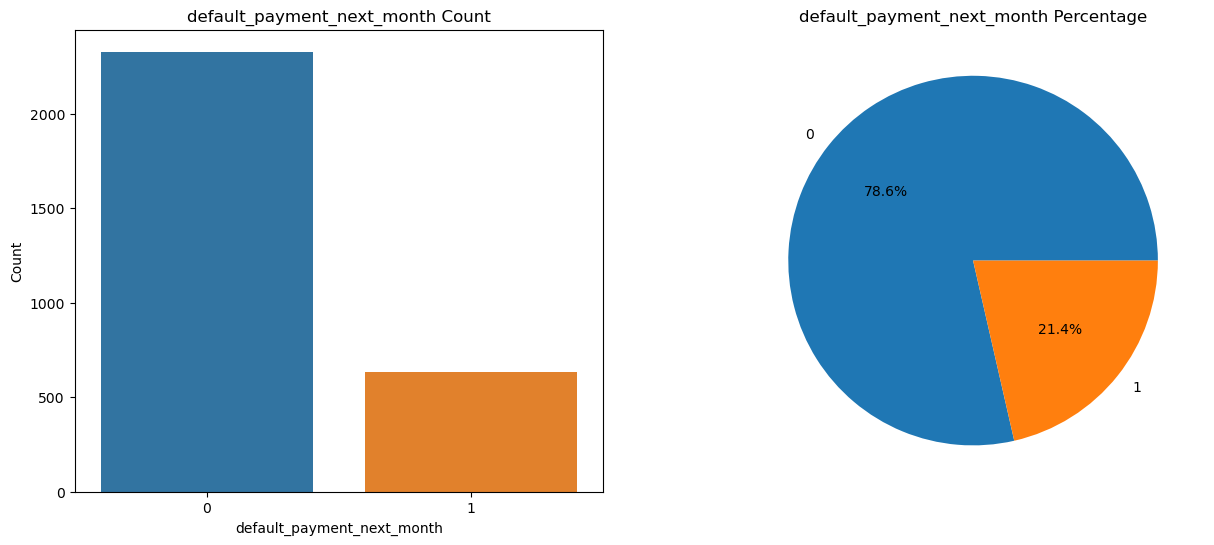

In [13]:
# Target column.

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='default_payment_next_month', data=data)
plt.title('default_payment_next_month Count')
plt.xlabel('default_payment_next_month')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(data.default_payment_next_month.value_counts(), labels=data.default_payment_next_month.value_counts().index, autopct='%1.1f%%')
plt.title('default_payment_next_month Percentage')
plt.show()

In simple terms, it can be seen that the default payment next month for customers who do not default, or 0, is 78.6%, and the default, or 1, is 21.4%. This means that one-fifth of the customers have defaulted.

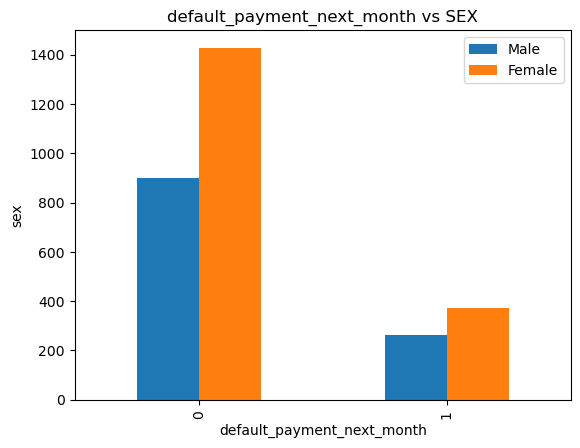

In [14]:
pd.crosstab(data['default_payment_next_month'],data['sex']).plot(kind='bar')
plt.title('default_payment_next_month vs SEX')
plt.xlabel('default_payment_next_month')
plt.ylabel('sex')
plt.legend(['Male', 'Female'])
plt.show()

Women dominate default customers, but this is because the major data is more women. 

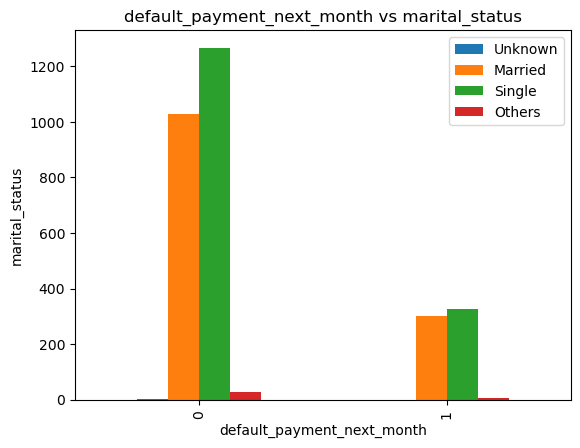

In [15]:
pd.crosstab(data['default_payment_next_month'],data['marital_status']).plot(kind='bar')
plt.title('default_payment_next_month vs marital_status')
plt.xlabel('default_payment_next_month')
plt.ylabel('marital_status')
plt.legend(['Unknown', 'Married', 'Single', 'Others'])
plt.show()

For married status, please note that the default is single and married; for other values, it is less clear (it may be divorce, etc.), so it cannot be compared.

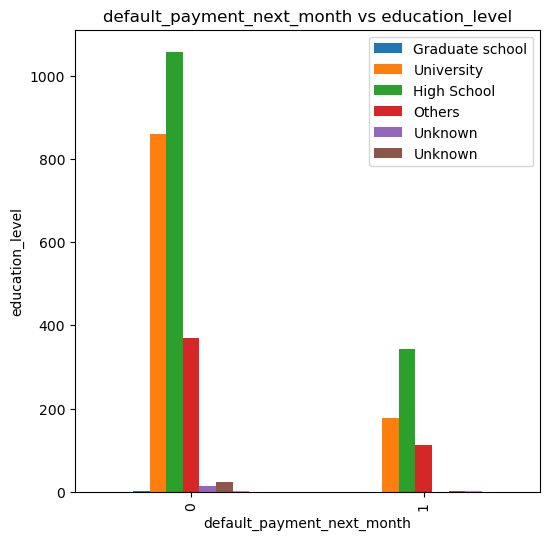

In [16]:
pd.crosstab(data['default_payment_next_month'],data['education_level']).plot(kind='bar', figsize=(6,6))
plt.title('default_payment_next_month vs education_level')
plt.xlabel('default_payment_next_month')
plt.ylabel('education_level')
plt.legend(['Graduate school','University','High School', 'Others', 'Unknown', 'Unknown'])
plt.show()

Graphically, it is almost the same as the previous graph, namely that the default values follow the major data as well as the education level; here, it turns out that the default is dominated by high school and university education. If the education level is high school, this can be used to further sort out new customers. 

# E. Data Preprocessing
*This section contains data preparation before modeling.*

### E1. Corelation dengan Heatmap
*To determine which feature to use, it looks for correlation with the target in each column.*

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


<AxesSubplot:>

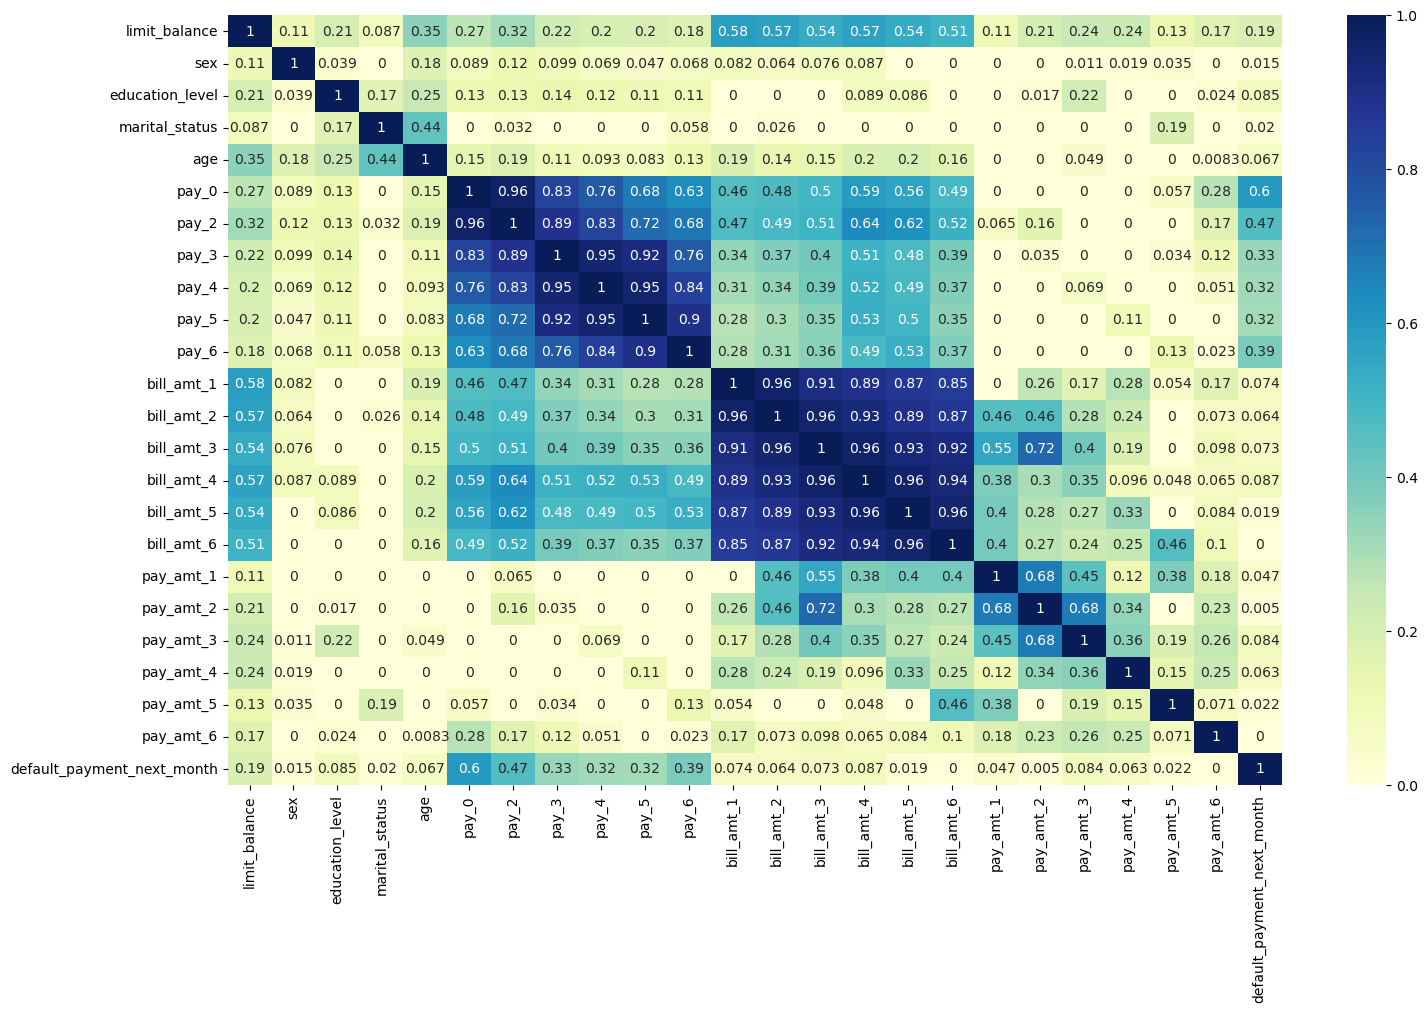

In [17]:
# Correlation 
plt.figure(figsize=(17,10))
sns.heatmap(data.phik_matrix(),
            vmin=0,
            vmax=1,
            annot=True,
            cmap='YlGnBu')

Limit balance, pay_0, pay_2,... pay, 6 are the seven columns that are related to the target. 

### E2. Feature Selection
*seleksi feature yang digunakan*

In [18]:
# Selection of features based on the correlation.
df = data[['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']]
df.head()

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,50000.0,0.0,0.0,0.0,0.0,0,0,0
1,110000.0,0.0,0.0,0.0,0.0,0,0,0
2,270000.0,0.0,0.0,0.0,2.0,0,0,0
3,130000.0,0.0,0.0,0.0,0.0,0,0,0
4,50000.0,0.0,0.0,0.0,0.0,0,0,0


### E3. Outlier

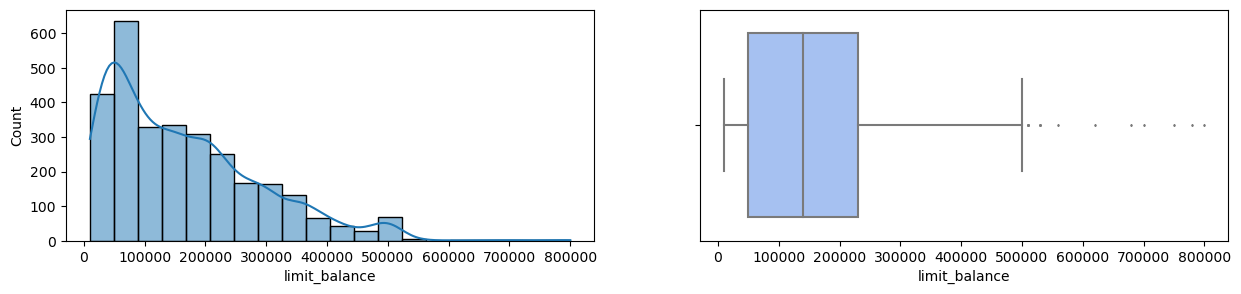

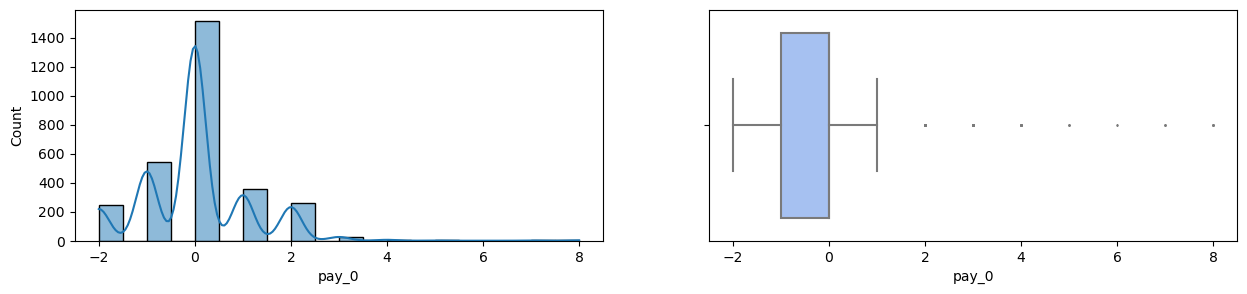

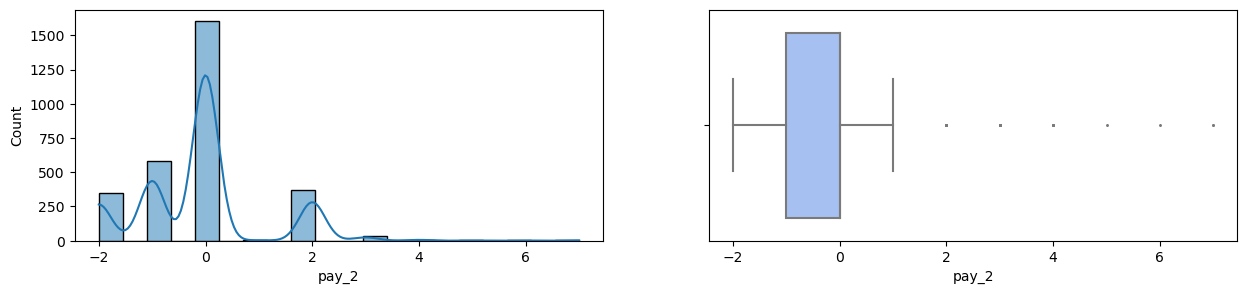

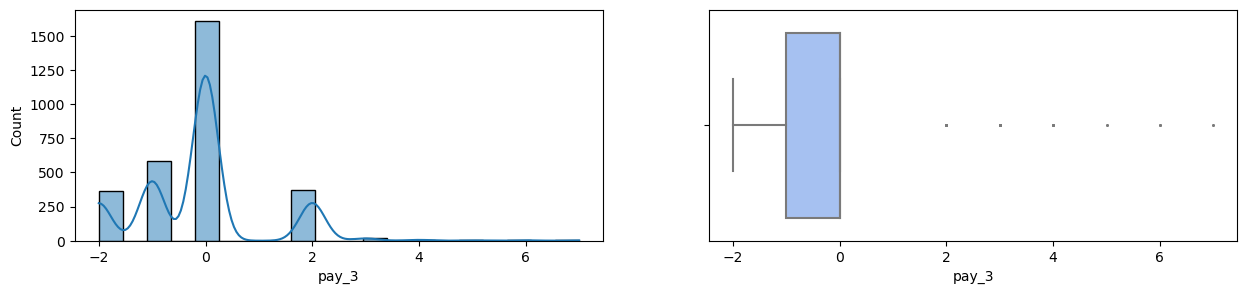

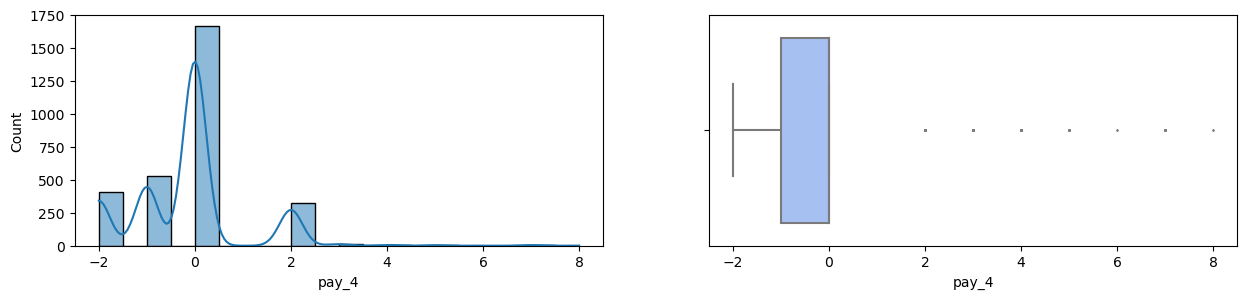

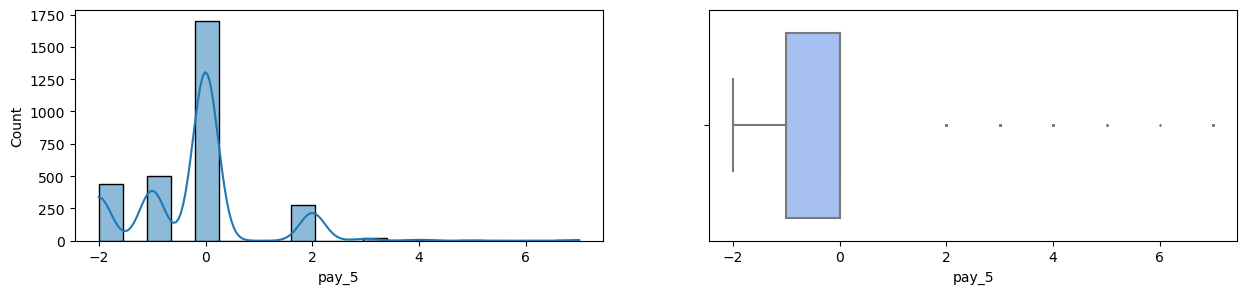

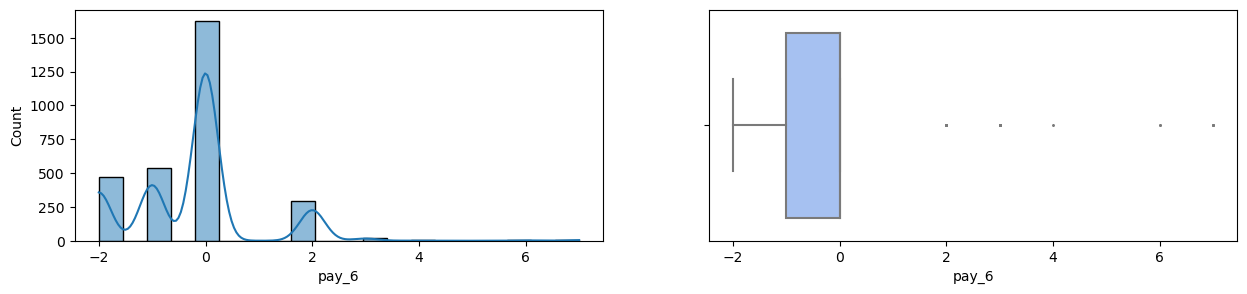

In [19]:
# Create functions to display the histogram and box plot.
num_col = ['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Handling outliers is not done because the number of outliers is not extreme. The consideration is because the data has been preencoded. To avoid the learning model being too simple and failing to fit the data reel, we will process the data directly.

### E4. Split Data
*There will be a separation of data inference, data training, and data testing.*

In [20]:
# inference
df_inf = df.sample(20, random_state=41)

# Separating inf data from datasets
df_train_test = df.drop(df_inf.index)

# Reset index for both data
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

In [21]:
# train_test_split
# separating training and test data.
train, test = train_test_split(df_train_test, test_size=0.3, random_state=41)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (2060, 8)
Test size:  (884, 8)


- 20 Retrieval of Inference Data
- inference data is dropped to be separated from the data.
- Then a 70 percent separation of train data and 30 percent test data

### E5. Split Feature dan Target

In [22]:
# Splitting feature and target data
X_train = train.drop(columns='default_payment_next_month')
y_train = train['default_payment_next_month']

X_test = test.drop(columns='default_payment_next_month')
y_test = test['default_payment_next_month']

### Fixing the data type

In [23]:
X_train = X_train.astype({'limit_balance':'int64'})
X_train = X_train.astype({'pay_0':'float64'})
X_train = X_train.astype({'pay_2':'float64'})
X_train = X_train.astype({'pay_3':'float64'})
X_train = X_train.astype({'pay_4':'float64'})
X_train = X_train.astype({'pay_5':'float64'})
X_train = X_train.astype({'pay_6':'float64'})

X_test = X_test.astype({'limit_balance':'int64'})
X_test = X_test.astype({'pay_0':'float64'})
X_test = X_test.astype({'pay_2':'float64'})
X_test = X_test.astype({'pay_3':'float64'})
X_test = X_test.astype({'pay_4':'float64'})
X_test = X_test.astype({'pay_5':'float64'})
X_test = X_test.astype({'pay_6':'float64'})

### E6. Handling imbalance data

Text(0.5, 1.0, 'Target Imbalanced')

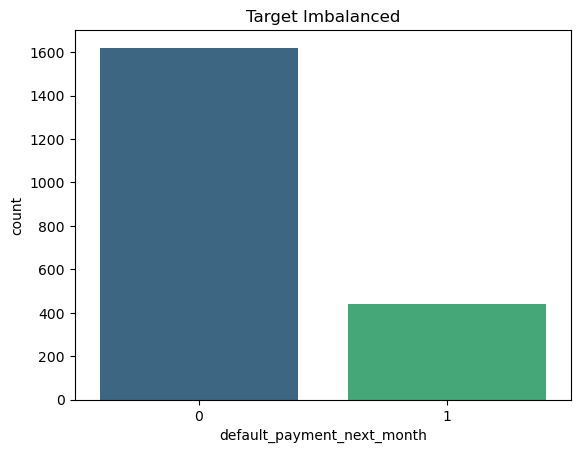

In [24]:
# Display the target barplot
y_train.value_counts()
sns.countplot(y_train ,palette='viridis')
plt.title('Target Imbalanced')

- the data train is not balanced; data balancing will be performed to improve the accuracy of learning the model. 

In [25]:
# Handling Imbalance Data on Train data
smote = SMOTENC([1,2,3,4,5,6], sampling_strategy='minority')
X_train ,y_train = smote.fit_resample(X_train ,y_train)

print(X_train.shape ,y_train.shape)

(3242, 7) (3242,)


Smote is a method for dealing with data imbalance; in simple terms, the smallest data is increased after the largest data.This value 1 will be multiplied by a number of values 0.
- SMOTENC is used because the data has categorical columns.

Text(0.5, 1.0, 'Target Balanced')

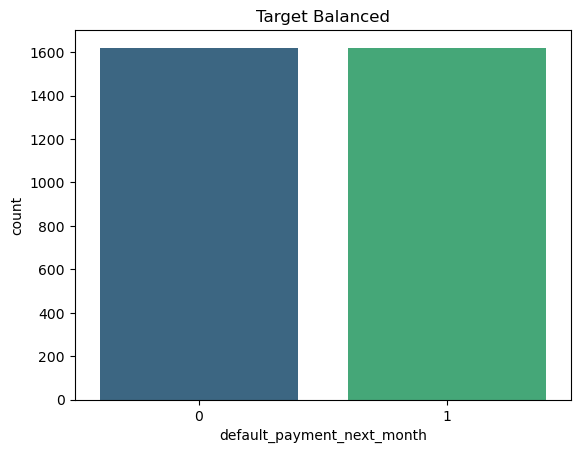

In [26]:
# Display a bar plot to see the results of the changes.
y_train.value_counts()
sns.countplot(y_train ,palette='viridis')
plt.title('Target Balanced')

X_train: The data has been balanced.
- No data balancing is performed on the X_test in order for the model to learn in real time from the test data because the target data is almost never balanced. 

### E7. Split numerical and categorical columns

In [27]:
# function to separate numeric columns with category columns
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Kolom numerical:', num_columns)
print('Kolom categorical:', cat_columns)

Kolom numerical: ['limit_balance', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
Kolom categorical: []


In [28]:
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

### E8. Feature Scalling

In [29]:
# Using StandardScaler, scale data X_train and X_test on num column. 
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [30]:
# make dataframe

X_train_scaled_df = pd.DataFrame(X_test_scaled)
X_train_scaled_df.head()

,0,1,2,3,4,5,6
0,1.302566,0.628487,-1.626247,-1.574846,-1.520944,-1.512198,-1.501836
1,-0.228670,-1.045069,1.492992,-0.808232,-0.755157,1.590679,1.613296
2,-1.079357,-0.208291,-0.066628,1.491611,1.542202,2.366399,1.613296
3,0.281742,-1.045069,1.492992,-0.808232,-0.755157,-0.736479,1.613296
4,1.812978,-0.208291,-0.066628,-0.041618,0.010629,0.039241,0.055730


- At first glance, this is the feature used, and the feature is ready to be used for modeling.

# F. Modeling

In [31]:
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)

# SVC
svc = SVC(probability=True)
svc.fit(X_train_scaled,y_train)

# DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

# RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

# KNNClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)

# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

### F1. Model Training Test

In [32]:

# Logistic Regression
y_pred_train_logreg = logreg.predict(X_train_scaled)
y_pred_test_logreg = logreg.predict(X_test_scaled)

# SVC
y_pred_train_svc = svc.predict(X_train_scaled)
y_pred_test_svc = svc.predict(X_test_scaled)

# DecisionTreeClassifier
y_pred_train_dt = dt.predict(X_train_scaled)
y_pred_test_dt = dt.predict(X_test_scaled)

# RandomForestClassifier
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

# KNNClassifier
y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)

# Gaussian Naive Bayes
y_pred_train_gnb = gnb.predict(X_train_scaled)
y_pred_test_gnb = gnb.predict(X_test_scaled)

# XGBoost Classifier
y_pred_train_xgb = xgb.predict(X_train_scaled)
y_pred_test_xgb = xgb.predict(X_test_scaled)

### F2. Model Evaluation

#### 1. Logistic Regression Evaluation

In [33]:
print("="*20,"LogisticRegression","="*20)
print("\n")

y_prob_train = logreg.predict_proba(X_train_scaled)[:,1]
y_prob_test = logreg.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_logreg, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_logreg, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== LogisticRegression ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1621
           1       0.69      0.70      0.69      1621

    accuracy                           0.69      3242
   macro avg       0.69      0.69      0.69      3242
weighted avg       0.69      0.69      0.69      3242

ROC-AUC Score Train: 0.7517798283707706


========== TEST ==========
              precision    recall  f1-score   support

           0       0.87      0.67      0.76       690
           1       0.36      0.65      0.46       194

    accuracy                           0.67       884
   macro avg       0.62      0.66      0.61       884
weighted avg       0.76      0.67      0.70       884

ROC-AUC Score Test: 0.7207007321081728


#### 2. SVC Evaluation

In [34]:
print("="*20,"SVC","="*20)
print("\n")

y_prob_train = svc.predict_proba(X_train_scaled)[:,1]
y_prob_test = svc.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_svc, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_svc, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== SVC ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.70      0.87      0.78      1621
           1       0.83      0.63      0.72      1621

    accuracy                           0.75      3242
   macro avg       0.76      0.75      0.75      3242
weighted avg       0.76      0.75      0.75      3242

ROC-AUC Score Train: 0.8180365963234704


========== TEST ==========
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       690
           1       0.49      0.51      0.50       194

    accuracy                           0.78       884
   macro avg       0.68      0.68      0.68       884
weighted avg       0.78      0.78      0.78       884

ROC-AUC Score Test: 0.738375915135216


#### 3. Decision Tree Classifier Evaluation

In [35]:
print("="*20,"Decision Tree","="*20)
print("\n")

y_prob_train = dt.predict_proba(X_train_scaled)[:,1]
y_prob_test = dt.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_dt, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_dt, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== Decision Tree ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1621
           1       0.96      0.86      0.91      1621

    accuracy                           0.91      3242
   macro avg       0.92      0.91      0.91      3242
weighted avg       0.92      0.91      0.91      3242

ROC-AUC Score Train: 0.977466670675332


========== TEST ==========
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       690
           1       0.45      0.40      0.42       194

    accuracy                           0.76       884
   macro avg       0.64      0.63      0.64       884
weighted avg       0.75      0.76      0.76       884

ROC-AUC Score Test: 0.6391901987150754


#### 4. Random Forest Classifier Evaluation

In [36]:
print("="*20,"Random Forest","="*20)
print("\n")

y_prob_train = rf.predict_proba(X_train_scaled)[:,1]
y_prob_test = rf.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== Random Forest ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1621
           1       0.94      0.88      0.91      1621

    accuracy                           0.91      3242
   macro avg       0.91      0.91      0.91      3242
weighted avg       0.91      0.91      0.91      3242

ROC-AUC Score Train: 0.9717299661559551


========== TEST ==========
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       690
           1       0.46      0.45      0.46       194

    accuracy                           0.76       884
   macro avg       0.65      0.65      0.65       884
weighted avg       0.76      0.76      0.76       884

ROC-AUC Score Test: 0.6926378305692515


#### 5. KNN Classifier Evaluation

In [37]:
print("="*20,"KNN","="*20)
print("\n")

y_prob_train = knn.predict_proba(X_train_scaled)[:,1]
y_prob_test = knn.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_knn, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_knn, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== KNN ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1621
           1       0.87      0.76      0.81      1621

    accuracy                           0.83      3242
   macro avg       0.83      0.83      0.82      3242
weighted avg       0.83      0.83      0.82      3242

ROC-AUC Score Train: 0.8918105631629283


========== TEST ==========
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       690
           1       0.48      0.49      0.49       194

    accuracy                           0.77       884
   macro avg       0.67      0.67      0.67       884
weighted avg       0.78      0.77      0.77       884

ROC-AUC Score Test: 0.6963693411026446


#### 6. Gaussian Naive Bayes Evaluation

In [38]:
print("="*20,"Gaussian Naive Bayes","="*20)
print("\n")

y_prob_train = gnb.predict_proba(X_train_scaled)[:,1]
y_prob_test = gnb.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_gnb, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_gnb, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== Gaussian Naive Bayes ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1621
           1       0.80      0.58      0.67      1621

    accuracy                           0.72      3242
   macro avg       0.74      0.72      0.71      3242
weighted avg       0.74      0.72      0.71      3242

ROC-AUC Score Train: 0.7491877695621282


========== TEST ==========
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       690
           1       0.47      0.53      0.50       194

    accuracy                           0.77       884
   macro avg       0.67      0.68      0.67       884
weighted avg       0.78      0.77      0.77       884

ROC-AUC Score Test: 0.7328626923651576


#### 7. XGBoost Classifier Evaluation

In [39]:
print("="*20,"XGBoost","="*20)
print("\n")

y_prob_train = xgb.predict_proba(X_train_scaled)[:,1]
y_prob_test = xgb.predict_proba(X_test_scaled)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_xgb, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_xgb, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

==================== XGBoost ====================


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      1621
           1       0.93      0.84      0.88      1621

    accuracy                           0.89      3242
   macro avg       0.89      0.89      0.89      3242
weighted avg       0.89      0.89      0.89      3242

ROC-AUC Score Train: 0.9583036647700351


========== TEST ==========
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       690
           1       0.51      0.43      0.47       194

    accuracy                           0.78       884
   macro avg       0.68      0.66      0.67       884
weighted avg       0.77      0.78      0.78       884

ROC-AUC Score Test: 0.6842970267443598


- Gaussian Naive Bayes is the best model based on ROC-AUC values.

In this GNB, the model learns with a balance between the data train and the test data, even though the accuracy value is low.

### F3. Cross Validation

In [40]:
skfold = StratifiedKFold(n_splits=10)

for model in [logreg, svc, dt, rf, knn, gnb, xgb]:
    scores_train = cross_val_score(model, X_train_scaled, y_train, cv=skfold, scoring="accuracy")
    scores_test = cross_val_score(model, X_test_scaled, y_test, cv=skfold, scoring="accuracy")

    print((f'{model}').split('(')[0])
    print(f'train mean accuracy :', '{:.3f}'.format(np.mean(scores_train)), '| train std accuracy :', '{:.3f}'.format(np.std(scores_train)))
    #print(f'test mean accuracy :', '{:.3f}'.format(np.mean(scores_test)), ' | test std accuracy :', '{:.3f}'.format(np.std(scores_test)))
    print()

LogisticRegression
train mean accuracy : 0.688 | train std accuracy : 0.021

SVC
train mean accuracy : 0.742 | train std accuracy : 0.024

DecisionTreeClassifier
train mean accuracy : 0.794 | train std accuracy : 0.064

RandomForestClassifier
train mean accuracy : 0.810 | train std accuracy : 0.055

KNeighborsClassifier
train mean accuracy : 0.763 | train std accuracy : 0.036

GaussianNB
train mean accuracy : 0.719 | train std accuracy : 0.018

XGBClassifier
train mean accuracy : 0.833 | train std accuracy : 0.073



- The best model for the mean accuracy value is **XGBClassifier**.
- and the **Standard Deviation** value indicates that **GaussianNB** is the best model.
- In the previous article, the author said that accuracy cannot be used to determine the best model because of the imbalanced data; therefore, the author compares various model evaluations to determine the best model.

### F4. Confusion Matrix

#### 1. LogisticRegression

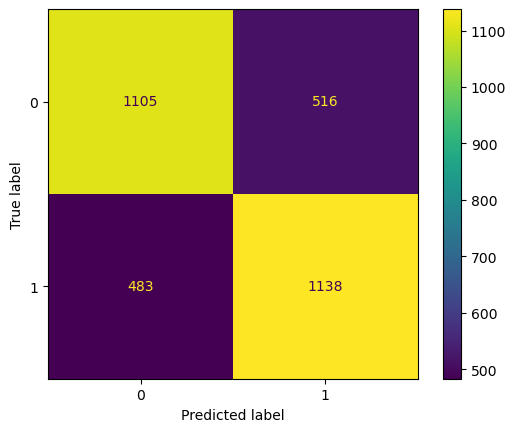

In [41]:
cm = confusion_matrix(y_train, y_pred_train_logreg, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

disp.plot()
plt.show()

#### 2. SVC

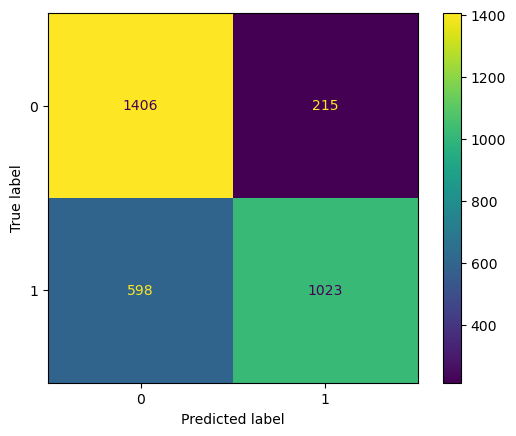

In [42]:
cm = confusion_matrix(y_train, y_pred_train_svc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

disp.plot()
plt.show()

#### 3. Decision Tree Classifier

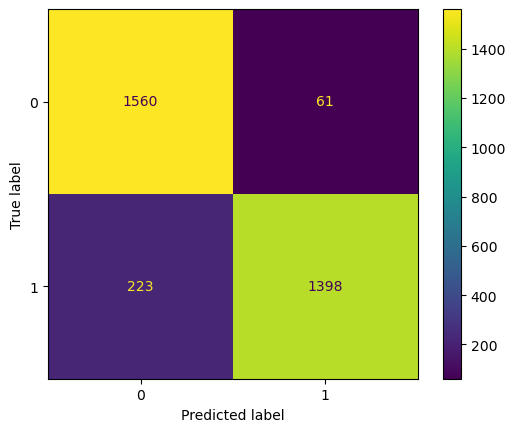

In [43]:
cm = confusion_matrix(y_train, y_pred_train_dt, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)

disp.plot()
plt.show()

#### 4. Random Forest Classifier

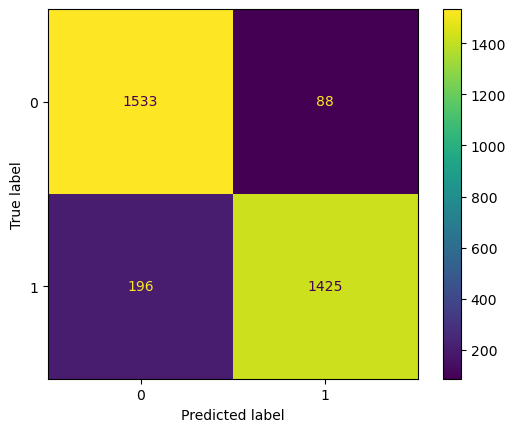

In [44]:
cm = confusion_matrix(y_train, y_pred_train_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

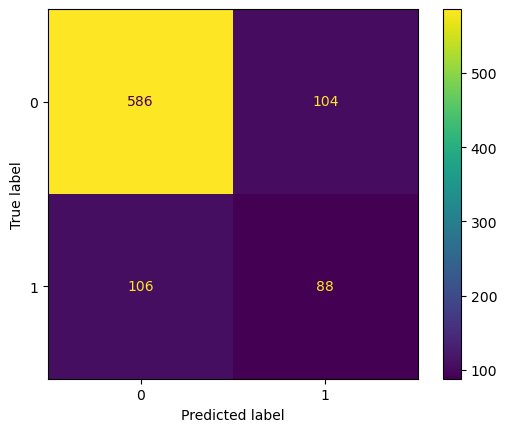

In [45]:
cm = confusion_matrix(y_test, y_pred_test_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

#### 5. KNeighborsClassifier

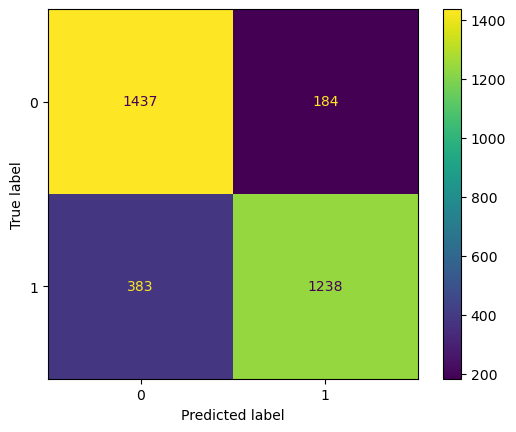

In [46]:
cm = confusion_matrix(y_train, y_pred_train_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()
plt.show()

#### 6. Gaussian Naive Bayes

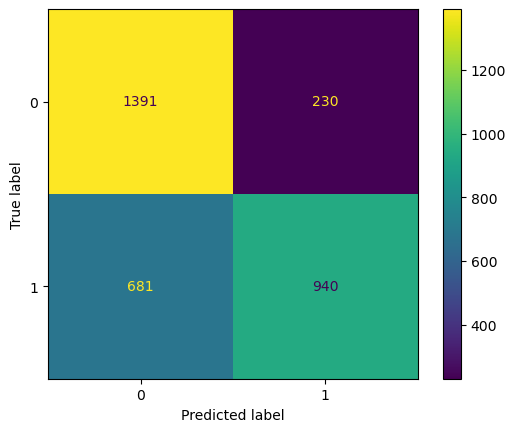

In [47]:
cm = confusion_matrix(y_train, y_pred_train_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot()
plt.show()

#### 7. XGBoost Classifier

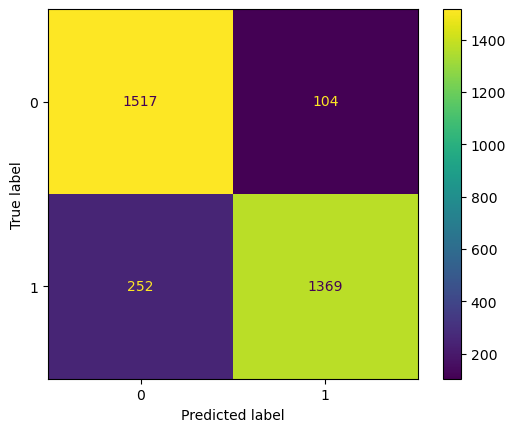

In [48]:
cm = confusion_matrix(y_train, y_pred_train_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)

disp.plot()
plt.show()

- The "confussion matrix evaluation" also shows that the "decision tree" is the best model, with the lowest recall error rate of mispredicted data.
- The value of the correct and false prediction models, as well as the data sorting, are used to determine the best model with this motede.
- We will focus on the values of "recall" and "precision," where "recall" means a customer who is not in default but is predicted to default, meaning that the bank is likely to lose a customer, and "precision" means the default customer is predicted not to default, meaning the bank will suffer a loss.
- Which is better in both of these cases? This is a difficult decision, but losing the customer is preferable to losing the bank.which means we will choose the smallest recall value from the confusion matrix evaluation.

### F5. GridSearch CV

In [ ]:
params = {
    'criterion': ['gini', 'entropy'],       # 2
    'max_depth': np.arange(2,9),            # 6
    'min_samples_split': np.arange(2,9)     # 6
}                                           # 2 x 6 x 6 = 24 combination pairs

In [ ]:
from sklearn.model_selection import GridSearchCV
dt= DecisionTreeClassifier(random_state=1)
dt_grid = GridSearchCV(dt, params, cv=10, scoring='recall', return_train_score=True)
dt_grid.fit(X_train_scaled, y_train)

In [ ]:
print('best params:', dt_grid.best_params_)
print('best score:', dt_grid.best_score_)

In [ ]:
dt_best = dt_grid.best_estimator_
print(dt_best)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)

In [ ]:
y_pred_train2 = dt_best.predict(X_train_scaled)
print('roc_auc train: ', roc_auc_score(y_train, y_pred_train2))

y_pred_test2 = dt_best.predict(X_test_scaled)
print('roc_auc test: ', roc_auc_score(y_test, y_pred_test2))

### F6. Data Inference

Data inference using the Gaussian Naive Bayes model; the author attempted to use the decision tree, but the results were not improved. The authors are trying to understand and ascertain these results because, in the decision tree, the model is too good at studying the training data and too bad at studying the test data. Meanwhile, in the Gaussian Naive Bayes model, the training data and test data are equally good, although the accuracy of the model is still not good.

In [50]:
data_inf_num = df_inf[num_columns]

In [51]:
data_inf_num_scaled = scaler.transform(data_inf_num)

In [52]:
y_pred_inf_dt = gnb.predict(data_inf_num_scaled)
y_pred_inf_df_dt = pd.DataFrame(y_pred_inf_dt, columns=['Predict_Default_PaymentNM '])
pd.concat([df_inf, y_pred_inf_df_dt], axis=1)

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month,Predict_Default_PaymentNM
0,20000.0,0.0,0.0,0.0,0.0,0,0,0,0
1,30000.0,2.0,2.0,2.0,2.0,2,2,0,1
2,240000.0,0.0,0.0,0.0,0.0,0,0,0,0
3,210000.0,0.0,0.0,0.0,0.0,0,0,0,0
4,10000.0,0.0,0.0,0.0,0.0,0,0,0,0
5,50000.0,0.0,0.0,0.0,0.0,0,0,0,0
6,10000.0,0.0,0.0,2.0,0.0,0,0,0,1
7,120000.0,0.0,-1.0,0.0,0.0,0,0,1,0
8,20000.0,1.0,2.0,2.0,2.0,0,0,0,1
9,140000.0,-1.0,-1.0,-2.0,-2.0,-1,0,0,0


# End Game

the best model is **Gaussian Naive Bayes**.
- then to review further is done **predict data inference** and the results according to this author are still suboptimal

- **the author does a preview** and gets **improving the model at a later stage.** i.e. **update the hyperparameter criteria on the best param and try again until the results are maximum.**
- and the second is to handling outlier
- that's all the notes on the results of this not optimal predict model because **the author has done optimal data processing** such as balancing, feature selection with the best correlation, no encoding because the data has been categorized, scalling colom that is necessary, and so on.

#### Translate
didapatkan model terbaik adalah **Gaussian Naive Bayes**.
- kemudian untuk meninjau lebih jauh lagi dilakukan **predict data inference** dan hasilnya menurut penulis ini masih kurang optimal

- **penulis melakukan preview** dan mendapatkan **improving model pada tahapan selanjutnya.** yaitu **perbaharui kriteria hyperparameter pada best param dan coba lagi hingga hasilnya maksimal.**
- dan yang kedua adalah lakukan handling outliet
- hanya itu kedua catatan pada hasil model predict yang kurang optimal ini karena **penulis telah melakukan pengolahan data yang optimal** seperti balancing, feature selection dengan korelasi terbaik, tidak ada encoding karena data telah kategorikan, scalling colom yang perlu saja, dan lain sebagainya.

# Conceptual Problems

Fungsi parameter criterion pada Decision Tree
- Decision tree adalah model prediksi menggunakan struktur pohon, konsep dari pohon keputusan adalah breakdown data. kemudian pada parameter kriterion yang berfungsi sebagai hyperparameter : jika criterion ini diubah2 makan akan didapatkan struktur pohon keputusan yang berbeda2.
terdapat Information_gain : criteria ini menghitung entropi dari semua atribut dan yang memiliki nilai entropi paling sedikit dipilih untuk di pisah.
- **penjelasan point 1 panjang dikarenakan ambigu pada penjelasan criterion atau parameter didalam criterion**

Fungsi dari pruning pada Tree model
- mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon yang telah terbentuk. Hal ini dikarenakan pohon keputusan yang dikontruksi dapat berukuran besar, maka dapat disederhanakan dengan melakukan pemangkasan

Cara memilih K yang optimal pada KNN
- jika binari pilihlah k dengan angka ganjil, dan gunakan cross validation untuk membantu memilih k optimal

Cross Validation
- cross validation adalah metode yang digunakan dengan tujuan untuk memperoleh hasil yang maksimal. metode ini dijalankan dimana percobaan sebanyak k kali untuk satu model dengan parameter yang sama.

Accuracy, Precision, Recall, F1 Score
- Accuracy adalah nilai rasio prediski benar (positif/negatif) dengan keseluruhan data, Precision : rasio prediksi benar positif dibandingkan dengan keseluruhan hasil prediksi positif, Recall : rasio prediksi benar positif dibandingkan dengan keseluruhan data yang sebenarnya positif, F1 Score : merupakan perbandingan rata-rata presisi dan recall yang dibobotkan.